# Dataset TF-IDF Visualization

I used this notebook for producing the TF-IDF bar graphs for the project. I used the c-TF-IDF algorithm to get class-based keywords and seaborn for the visualizations. First, I will start by importing the packages, reading in the processed dataset, setting the seaborn theme, and defining a function for getting the c-TF-IDF term-score data frames for the visualizations.

In [1]:
# Import the packages
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%run ../external/ctfidf

# Load the dataset
df = pd.read_csv('../data/travel_processed.csv')

# Set a plot theme for seaborn
sns.set_theme(style='ticks', rc={"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, 'savefig.dpi':300}, font='Arial')

# Define a function that will get a class-based TF-IDF stats for each class
def get_ctfidf(df, group, group_class, num_classes, top_terms):
    docs_per_pres = df.groupby([group], as_index=False).agg({'remarks': ' '.join})

    count_vectorizer = CountVectorizer().fit(docs_per_pres.remarks)
    count = count_vectorizer.transform(docs_per_pres.remarks)
    words = count_vectorizer.get_feature_names_out()

    ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(df)).toarray()  
    words_per_class = {docs_per_pres[group][label]: [[words[index], ctfidf[label][index]] for index in ctfidf[label].argsort()[-top_terms:]] for label in range(num_classes)}
    terms = pd.DataFrame({'term' : [x[0] for x in words_per_class[group_class]], 'score' : [x[1] for x in words_per_class[group_class]]}).sort_values(by='score', ascending=False)
    return terms

### Keywords by visit type (president/secretary)
Now, call the functions to get the necessary c-TF-IDF dataframes for the president and secretary portions of the dataset.

In [2]:
terms_pres = get_ctfidf(df, 'visit_type', 'president', 2, 20)
terms_sec = get_ctfidf(df, 'visit_type', 'secretary', 2, 20)

Text(0, 0.5, 'Term')

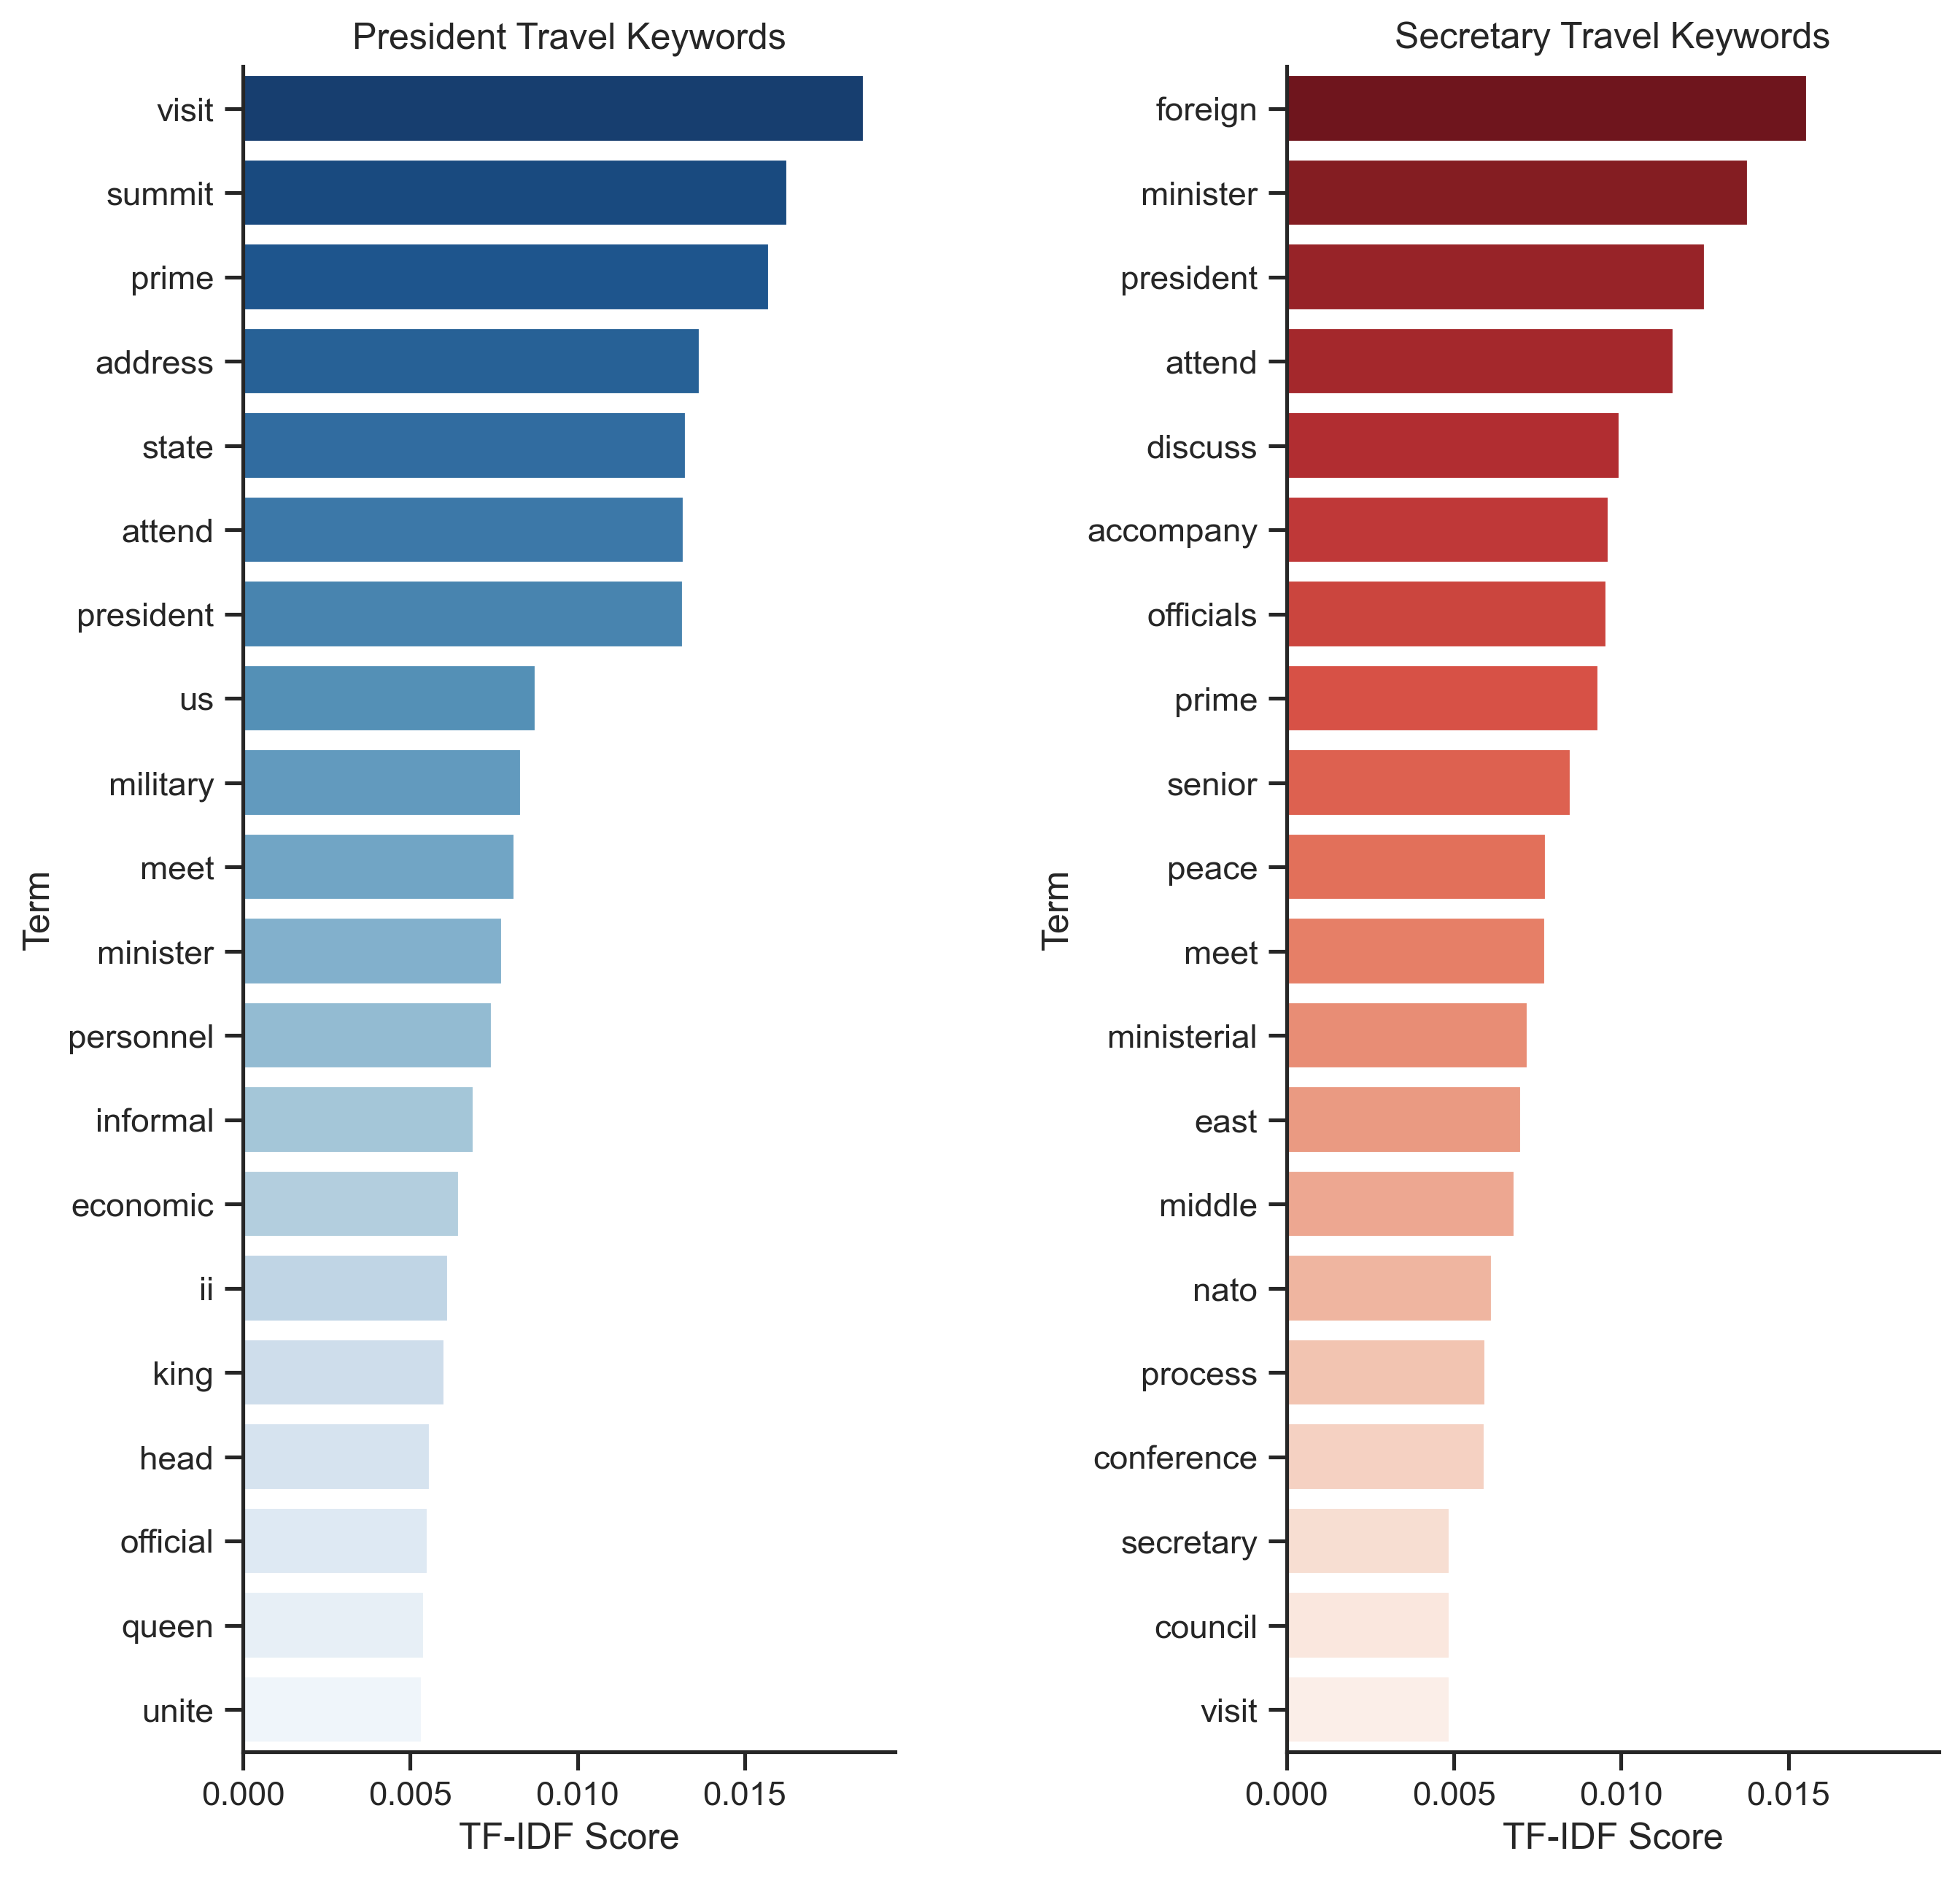

In [3]:
# Plot the graphs
fig, ax = plt.subplots(1,2, sharex=True)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace=0.6)
sns.barplot(data=terms_pres, x='score', y='term', palette='Blues_r', ax=ax[0])
sns.barplot(data=terms_sec, x='score', y='term', palette='Reds_r', ax=ax[1])

# Set the labels for the subplots
ax[0].set_title('President Travel Keywords')
ax[0].set_xlabel('TF-IDF Score')
ax[0].set_ylabel('Term')
ax[1].set_title('Secretary Travel Keywords')
ax[1].set_xlabel('TF-IDF Score')
ax[1].set_ylabel('Term')

### Keywords by president (persona)
Get the list of all secretaries and presidents represented in the dataset and manually explore the top terms.

In [4]:
# Get the array of names of all officials
name_arr = df['name'].drop_duplicates().tolist()

# Data frame print statements are commented out for aesthetic reasons
for name in name_arr:
    print(name)
    # print(get_ctfidf(df, 'name', name, len(name_arr), 5)[:5])

Theodore Roosevelt
William Howard Taft
Woodrow Wilson
Warren G. Harding
Calvin Coolidge
Herbert C. Hoover
Franklin D. Roosevelt
Harry S. Truman
Dwight D. Eisenhower
John F. Kennedy
Lyndon B. Johnson
Richard M. Nixon
Gerald R. Ford
Jimmy Carter
Ronald Reagan
George H.W. Bush
William J. Clinton
George W. Bush
Barack Obama
Donald J. Trump
William Henry Seward
John Milton Hay
Elihu Root
Philander Chase Knox
Robert Lansing
Bainbridge Colby
Charles Evans Hughes
Frank Billings Kellogg
Henry Lewis Stimson
Cordell Hull
Edward Reilly Stettinius Jr.
James Francis Byrnes
George Catlett Marshall
Dean Gooderham Acheson
John Foster Dulles
Christian Archibald Herter
David Dean Rusk
William Pierce Rogers
Henry A. (Heinz Alfred) Kissinger
Cyrus Roberts Vance
Edmund Sixtus Muskie
Alexander Meigs Haig Jr.
George Pratt Shultz
James Addison Baker III
Warren Minor Christopher
Madeleine Korbel Albright
Colin Luther Powell
Condoleezza Rice
Hillary Rodham Clinton
John Forbes Kerry
Rex W. Tillerson
Michael R. Po

In [5]:
# Get the data frames of some presidents
df_tr = get_ctfidf(df, 'name', 'Donald J. Trump', len(df['name'].drop_duplicates()), 5)
df_rg = get_ctfidf(df, 'name', 'Ronald Reagan', len(df['name'].drop_duplicates()), 5)
df_bhv = get_ctfidf(df, 'name', 'George H.W. Bush', len(df['name'].drop_duplicates()), 5)
df_cl = get_ctfidf(df, 'name', 'William J. Clinton', len(df['name'].drop_duplicates()), 5)
df_rs = get_ctfidf(df, 'name', 'Franklin D. Roosevelt', len(df['name'].drop_duplicates()), 5)
df_bo = get_ctfidf(df, 'name', 'Barack Obama', len(df['name'].drop_duplicates()), 5)

[Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term')]

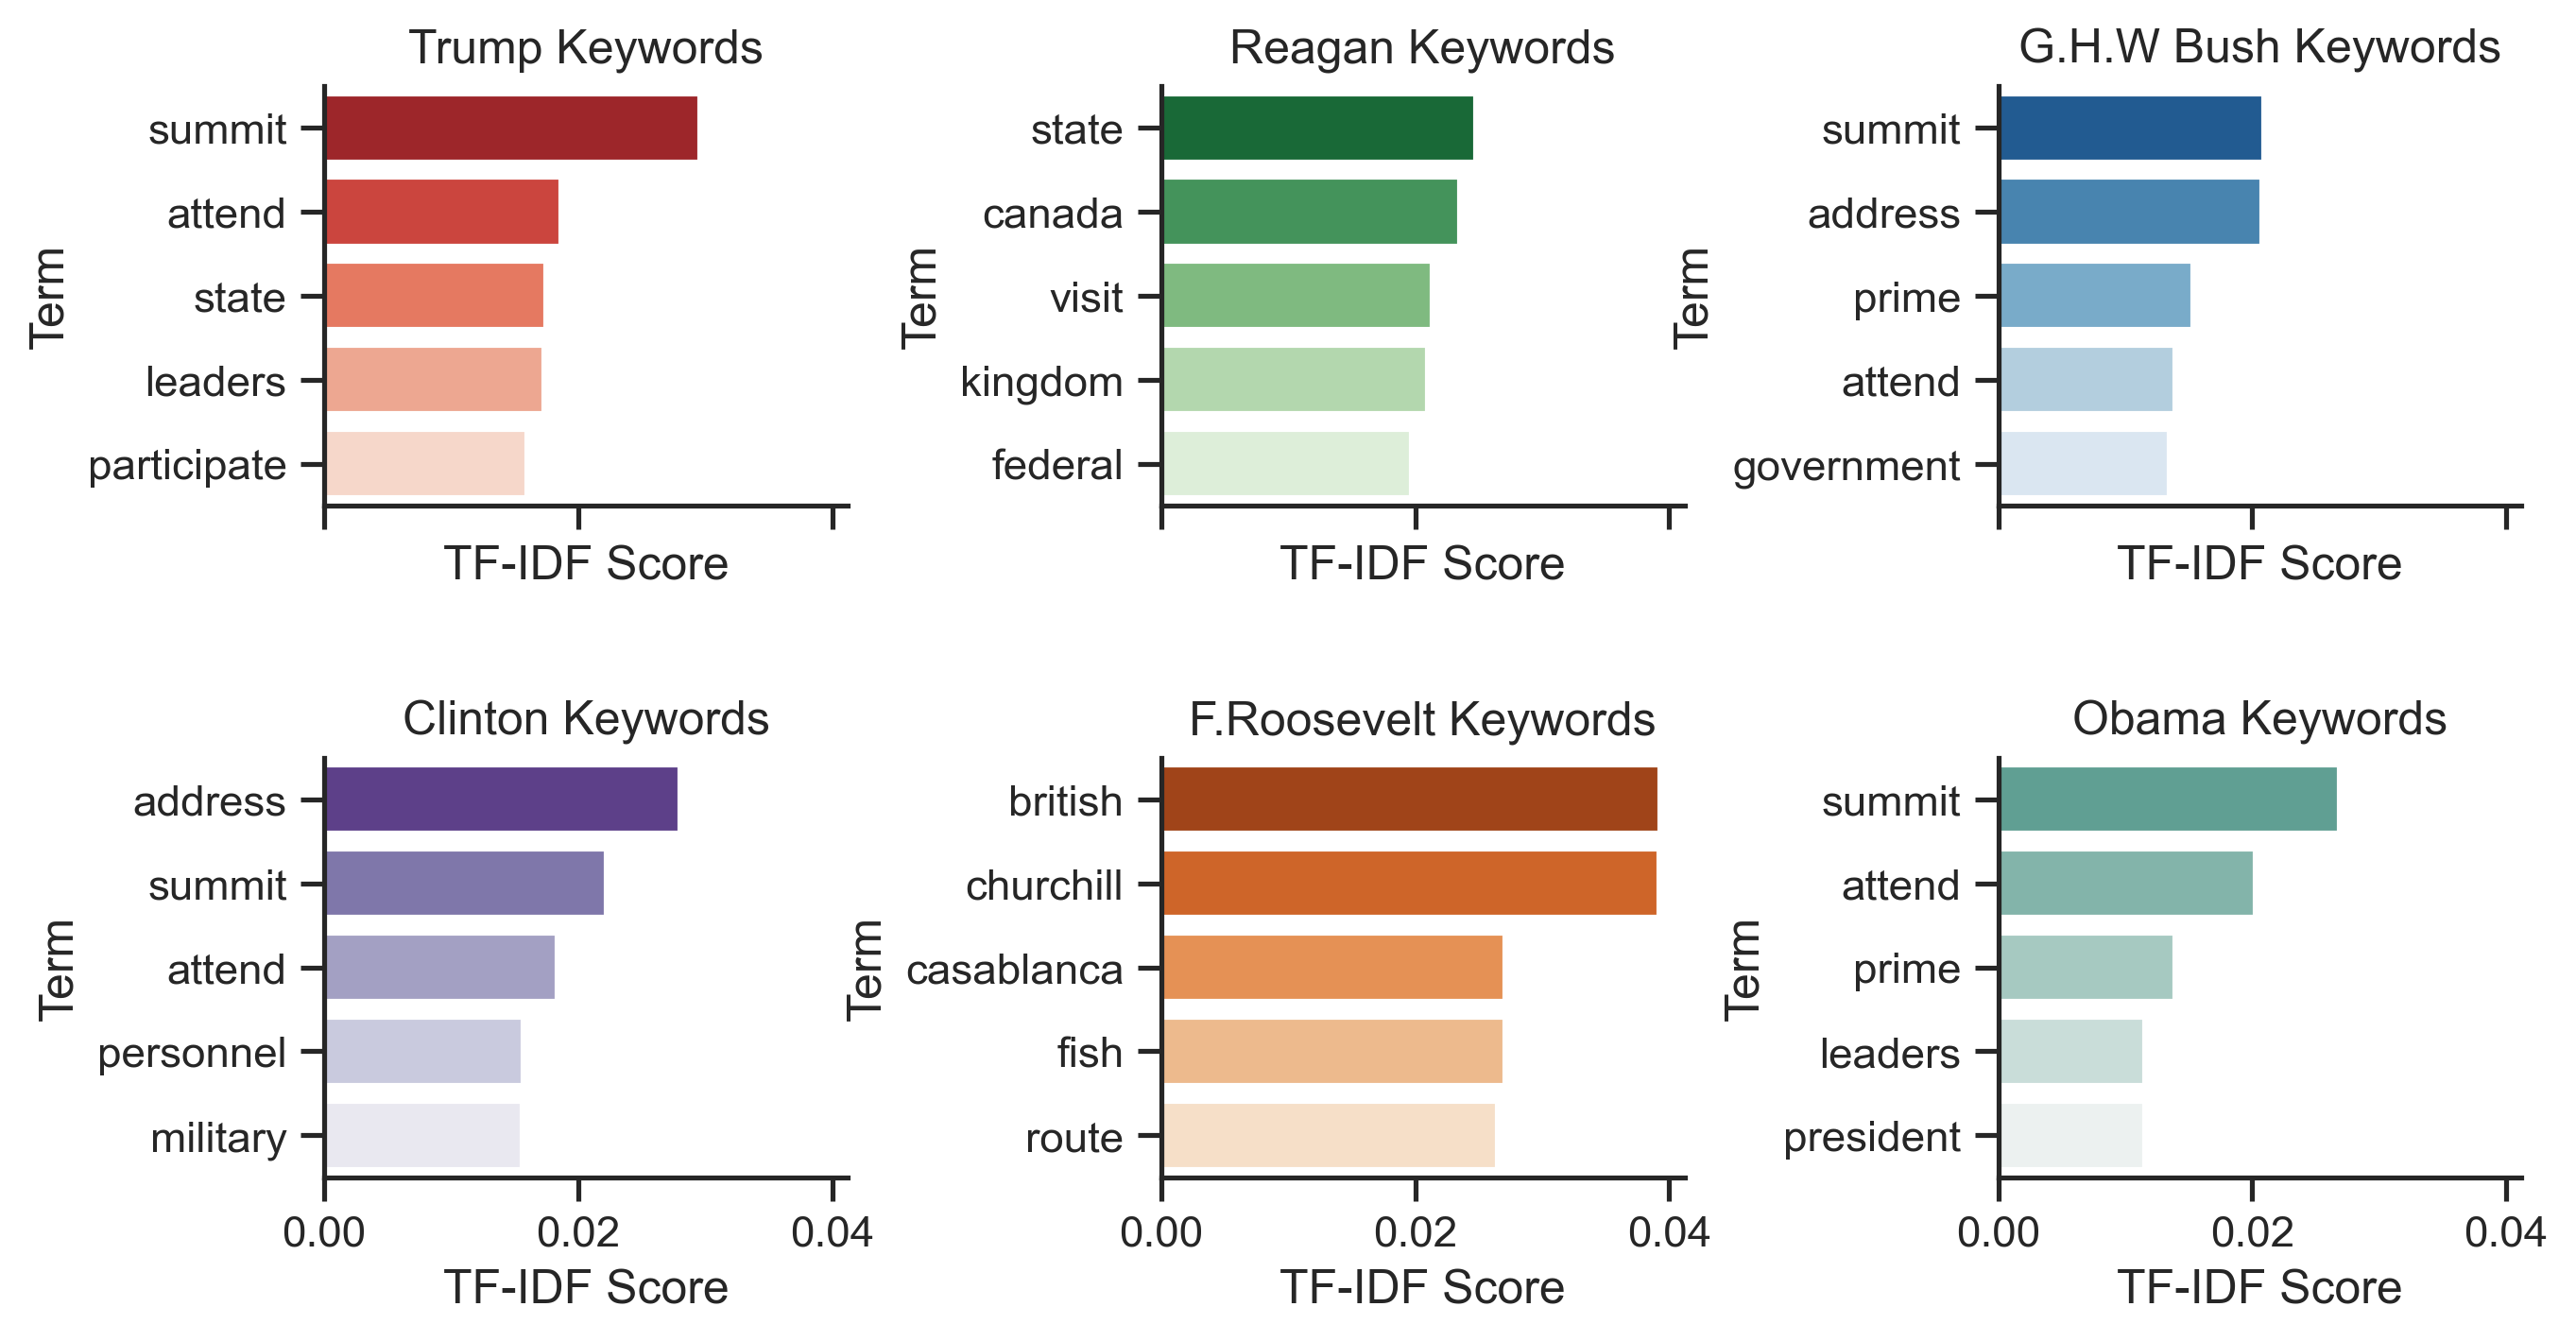

In [6]:
# Create the plots for the TF-IDF scores of each president
fig, ax = plt.subplots(2,3, sharex=True)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.6, hspace=0.6)
sns.barplot(data=df_tr, x='score', y='term', palette='Reds_r', ax=ax[0,0])
sns.barplot(data=df_rg, x='score', y='term', palette='Greens_r', ax=ax[0,1])
sns.barplot(data=df_bhv, x='score', y='term', palette='Blues_r', ax=ax[0,2])
sns.barplot(data=df_cl, x='score', y='term', palette='Purples_r', ax=ax[1,0])
sns.barplot(data=df_rs, x='score', y='term', palette='Oranges_r', ax=ax[1,1])
sns.barplot(data=df_bo, x='score', y='term', palette='light:#5A9_r', ax=ax[1,2])

# Set the labels for the subplots
ax[0,0].set_title('Trump Keywords')
ax[0,1].set_title('Reagan Keywords')
ax[0,2].set_title('G.H.W Bush Keywords')
ax[1,0].set_title('Clinton Keywords')
ax[1,1].set_title('F.Roosevelt Keywords')
ax[1,2].set_title('Obama Keywords')

[x.set_xlabel('TF-IDF Score') for y in ax for x in y]
[x.set_ylabel('Term') for y in ax for x in y]

### Keywords by country
Get the list of all countries represented in the dataset, and get the TF-IDF scores for them.

In [7]:
# Get the array of countries in the dataset similar to how we got the names
country_arr = df['country'].drop_duplicates().tolist()

# Data frame print statements are commented out for aesthetic reasons
for country in country_arr:
    print(country)
    # print(get_ctfidf(df, 'country', country, len(country_arr), 5)[:5])

Panama
Mexico
United Kingdom
France
Italy
Vatican City
Belgium
Canada
Cuba
Honduras
El Salvador
Nicaragua
Costa Rica
Ecuador
Peru
Chile
Argentina
Uruguay
Brazil
Haiti
Colombia
Morocco
Liberia
Tunisia
Egypt
Iran
U.S.S.R.
Germany
Korea, Republic of
Switzerland
Germany, Federal Republic of
Turkey
Pakistan
Afghanistan
India
Greece
Spain
Portugal
Philippines
Republic of China
Austria
Venezuela
Ireland
New Zealand
Australia
Vietnam
Thailand
Malaysia
Suriname
Guatemala
Indonesia
Romania
Yugoslavia
China, People’s Republic of
Poland
Iceland
Saudi Arabia
Syria
Israel
Jordan
Japan
Finland
Nigeria
Jamaica
Barbados
Grenada
Hungary
Netherlands
Malta
Czechoslovakia
Singapore
Somalia
Russia
Czech Republic
Ukraine
Belarus
Latvia
Kuwait
Bosnia-Herzegovina
Croatia
Denmark
Ghana
Uganda
Rwanda
South Africa
Botswana
Senegal
Palestinian Authority
Slovenia
Macedonia, Former Yugoslav Republic of
Norway
Bulgaria
Serbia-Montenegro (Kosovo)
Bangladesh
Oman
Tanzania
Brunei Darussalam
Sweden
Yugoslavia (Kosovo)
Ch

In [8]:
# Get the data frames of some countries
df_vatican = get_ctfidf(df, 'country', 'Vatican City', len(df['country'].drop_duplicates()), 5)
df_malta = get_ctfidf(df, 'country', 'Malta', len(df['country'].drop_duplicates()), 5)
df_czech = get_ctfidf(df, 'country', 'Czechoslovakia', len(df['country'].drop_duplicates()), 5)
df_bah = get_ctfidf(df, 'country', 'Bahamas', len(df['country'].drop_duplicates()), 5)
df_png = get_ctfidf(df, 'country', 'Papua New Guinea', len(df['country'].drop_duplicates()), 5)
df_sl = get_ctfidf(df, 'country', 'Sierra Leone', len(df['country'].drop_duplicates()), 5)

[Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term'),
 Text(0, 0.5, 'Term')]

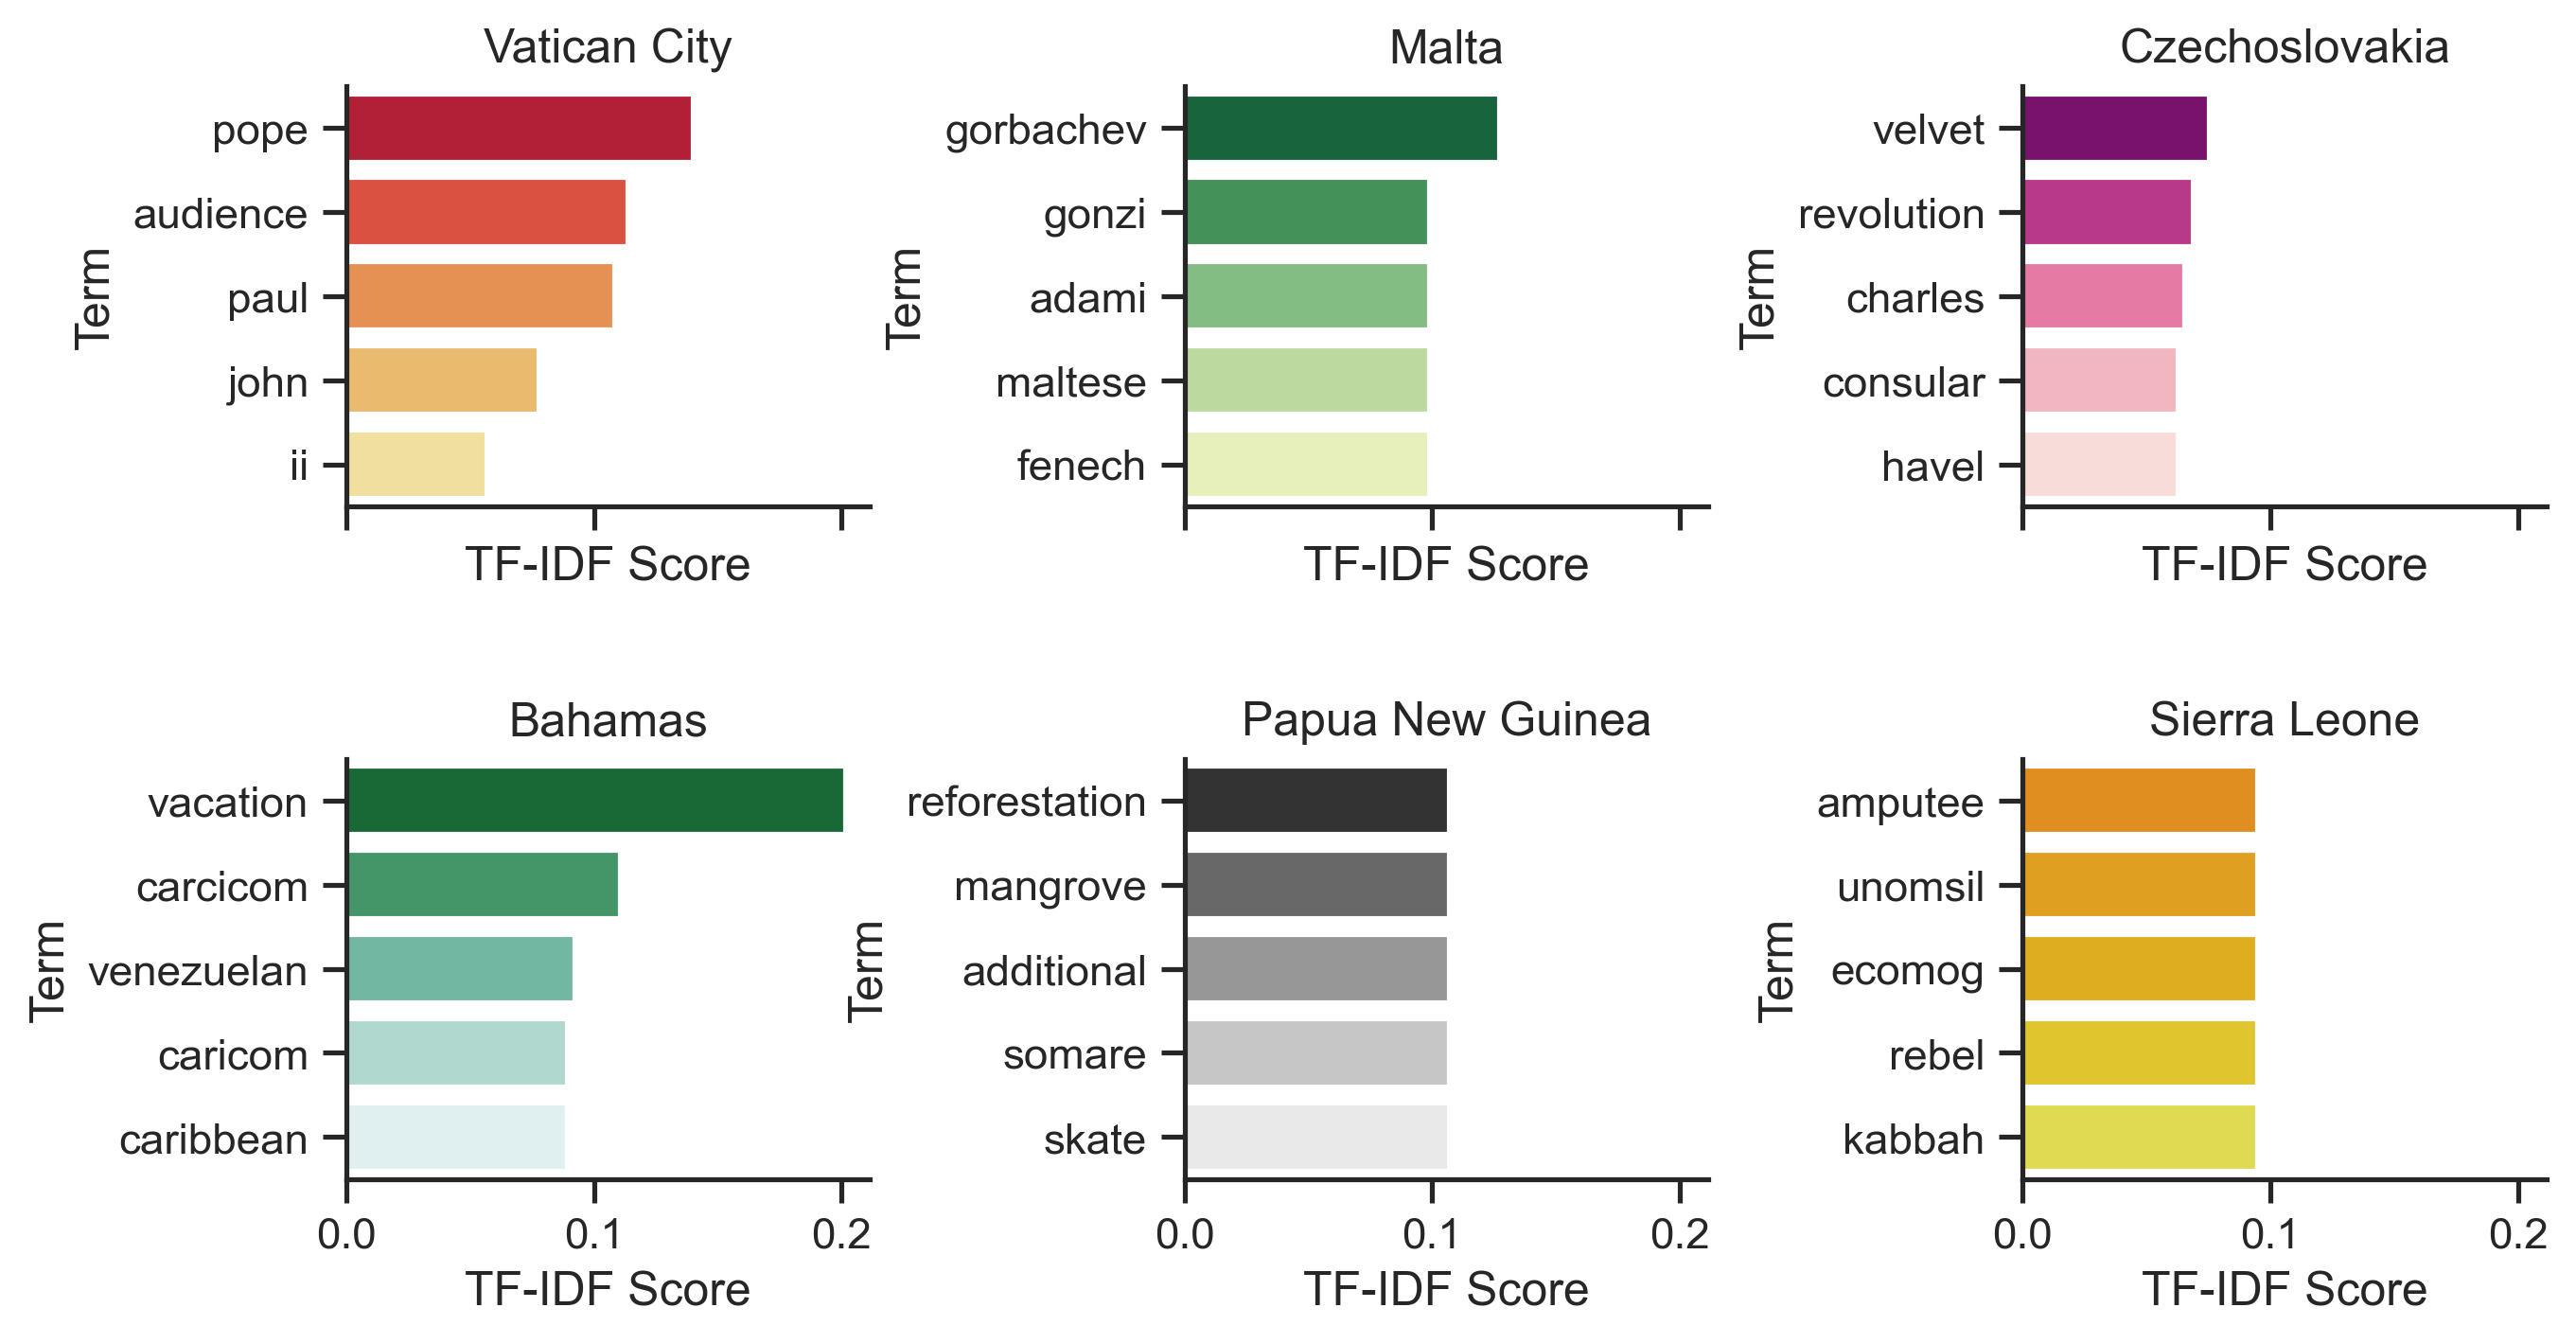

In [9]:
# Create the plots for the TF-IDF scores of each country
fig, ax = plt.subplots(2,3, sharex=True)
fig.set_size_inches(10,5)
fig.subplots_adjust(wspace=0.6, hspace=0.6)
sns.barplot(data=df_vatican, x='score', y='term', palette='YlOrRd_r', ax=ax[0,0])
sns.barplot(data=df_malta, x='score', y='term', palette='YlGn_r', ax=ax[0,1])
sns.barplot(data=df_czech, x='score', y='term', palette='RdPu_r', ax=ax[0,2])
sns.barplot(data=df_bah, x='score', y='term', palette='BuGn_r', ax=ax[1,0])
sns.barplot(data=df_png, x='score', y='term', palette='Greys_r', ax=ax[1,1])
sns.barplot(data=df_sl, x='score', y='term', palette='Wistia_r', ax=ax[1,2])

# Set the labels for the subplots
ax[0,0].set_title('Vatican City')
ax[0,1].set_title('Malta')
ax[0,2].set_title('Czechoslovakia')
ax[1,0].set_title('Bahamas')
ax[1,1].set_title('Papua New Guinea')
ax[1,2].set_title('Sierra Leone')

[x.set_xlabel('TF-IDF Score') for y in ax for x in y]
[x.set_ylabel('Term') for y in ax for x in y]